In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from rich.console import Console

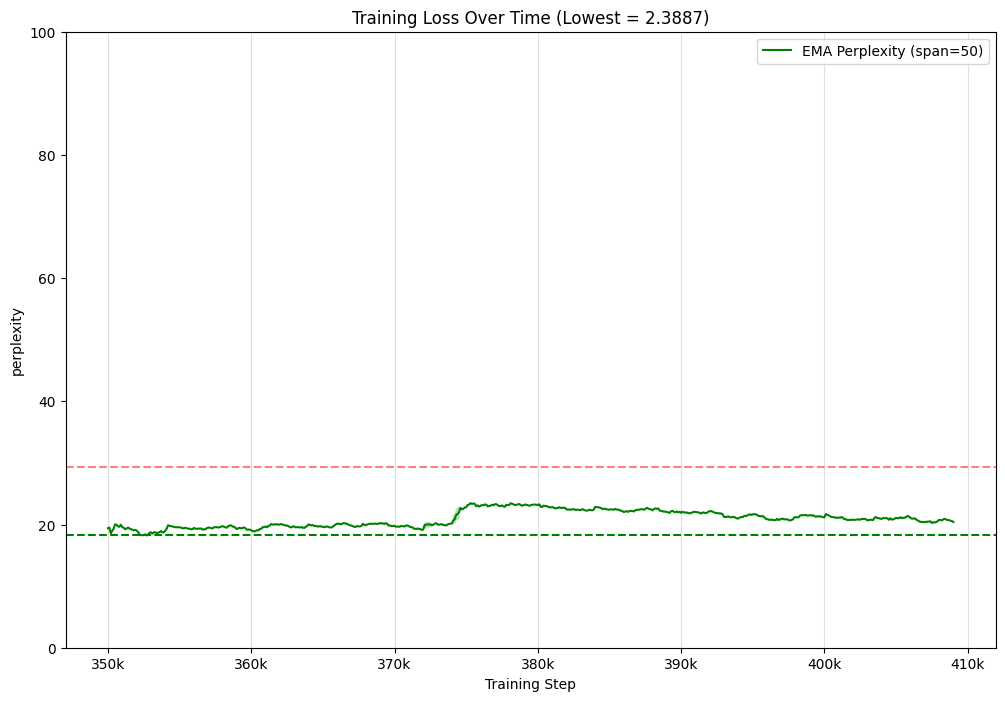

In [2]:
# load training_log.csv and print average_loss over time
df = pd.read_csv('model/1024d_24l_24h_4kv.csv')
fig, ax = plt.subplots(figsize=(12, 8))

df = df[df['step'] >= 350000]

lowest_loss = df['avg_loss'].min()

# df["ema_loss"] = df["avg_loss"].ewm(span=20).mean()
# sns.lineplot(data=df, x='step', y='best_loss', ax=ax, color='orange', label='best_loss')
# sns.lineplot(data=df, x='step', y='ema_loss', ax=ax, label='EMA Loss (span=50)', color='blue')
# ax.axhline(lowest_loss, color='green', linestyle='--', label=f'Lowest Avg Loss: {lowest_loss:.4f}')
# ax.axhline(3, color='red', linestyle='--', label='Threshold: 2.5', alpha=0.5)
# ax.axhline(1.5, color='green', linestyle='--', label='Threshold: 1.5', alpha=0.5)


df['perplexity'] = np.exp(df['avg_loss']).ewm(span=50).mean()
min_perplexity = df['perplexity'].min()
sns.lineplot(data=df, x='step', y='perplexity', ax=ax, label='EMA Perplexity (span=50)', color='green')
ax.axhline(min_perplexity, color='green', linestyle='--', label=f'Min Perplexity: {min_perplexity:.4f}')
ax.axhline(29.41, color='red', linestyle='--', label='GPT-2 117M', alpha=0.5)
ax.set_ylim(0, 100)

# ax2 = ax.twinx()
# ax2.plot(df['step'], df['ema_loss'], color='blue', label='EMA Loss')
# ax2.set_ylabel('Loss')

# for step in range(0, df['step'].max(), 1000):
#     # put a vertical line every 1000 steps.
#     ax.axvline(step, color='gray', linestyle=':', alpha=0.7)
#     # display the loss at that step at the top of the line, in gray.
#     loss_at_step = df[df['step'] == step]['avg_loss']
#     if not loss_at_step.empty:
#         ax.text(step + 12, df['avg_loss'].max(), f'{loss_at_step.values[0]:.2f}', rotation=90, verticalalignment='top', color='gray', alpha=0.7)


ax.set_xlim(None, None)
# ax.set_yscale('log')

ax.set_title('Training Loss Over Time (Lowest = {:.4f})'.format(lowest_loss))
ax.set_xlabel('Training Step')
# Apply a formatter to the x axis to show every 1000 steps

def kfmt(x, pos):
    # show integers like 0, 5k, 10k, 25k, ...
    if x == 0:
        return "0"
    return f"{int(x/1000)}k"

ax.xaxis.set_major_formatter(ticker.FuncFormatter(kfmt))

ax.grid(axis='x', alpha=0.4)
# ax.set_ylabel('Loss')
plt.show()